## Question 1: Loading and Preprocessing

In [7]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

df.isnull().sum()

df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


##  Question 2A: KMeans Clustering

C:\Users\arunj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


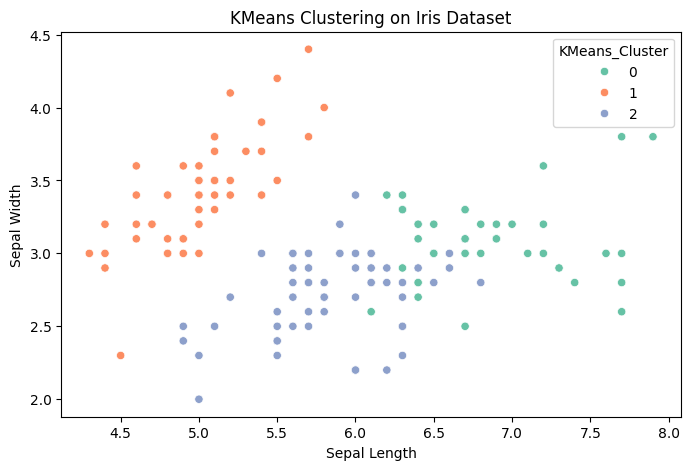

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Fit KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(df)

# Visualize (using first two features)
plt.figure(figsize=(8,5))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue=df['KMeans_Cluster'], palette='Set2')
plt.title("KMeans Clustering on Iris Dataset")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()


## Question 2B: Hierarchical Clustering

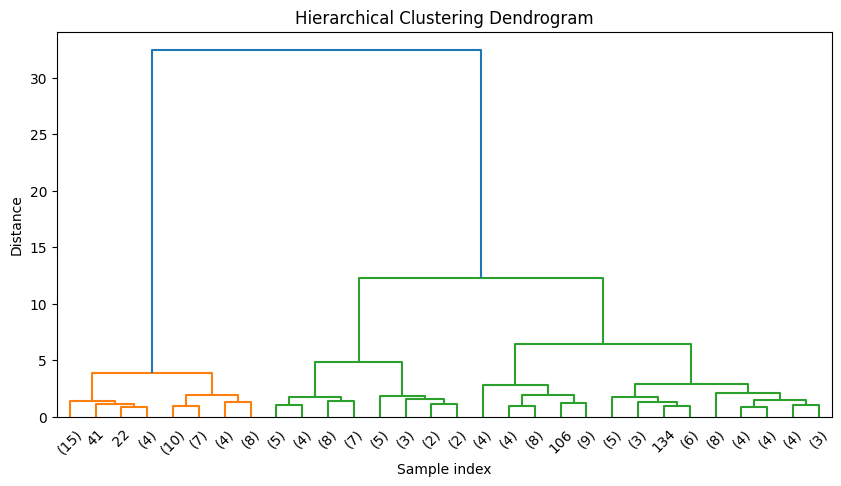

In [3]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Perform hierarchical clustering
linkage_matrix = linkage(df.iloc[:, :4], method='ward')  # use original 4 features

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, truncate_mode='lastp', p=30)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

# Assign clusters
df['Hier_Cluster'] = fcluster(linkage_matrix, 3, criterion='maxclust')


In [4]:
# 2D Cluster Visualization

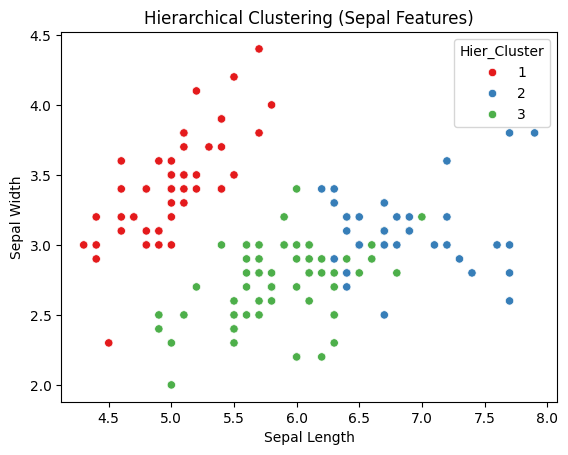

In [5]:
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue=df['Hier_Cluster'], palette='Set1')
plt.title("Hierarchical Clustering (Sepal Features)")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()


## Question 3: Conclusion

I applied two clustering algorithms (KMeans and Hierarchical) to the Iris dataset after removing the target column.

- **KMeans Clustering** produced clear groupings with good visual separation.
- **Hierarchical Clustering** helped visualize the grouping structure using a dendrogram and also formed distinct clusters.

Both methods successfully grouped the data into 3 clusters, matching the number of species in the original dataset. This task helped me understand how unsupervised learning can find structure in unlabeled data.